# LGMVIP - Data Science Intern, April-2022

### AUTHOR - Karan Doke

## More Advanced Level Task

### TASK-10- : ML Facial recognition to detect mood and suggest songs accordingly

### Dataset link : https://www.kaggle.com/msambare/fer2013

In [1]:
pip install scikit-image

### Importing Libraries

In [68]:
#Import Libraries/Packages
import numpy as np
import cv2
import os
import random
from skimage.io import imread
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
print("TensorFlow version :", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow version : 2.8.0
Num GPUs Available:  0


### Training

In [3]:
train_dir = r'E:\INTERNSHIP\Lets Grow More Internship\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\train'
test_dir = r'E:\INTERNSHIP\Lets Grow More Internship\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\test'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path +"/" +expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


### Data Visualization

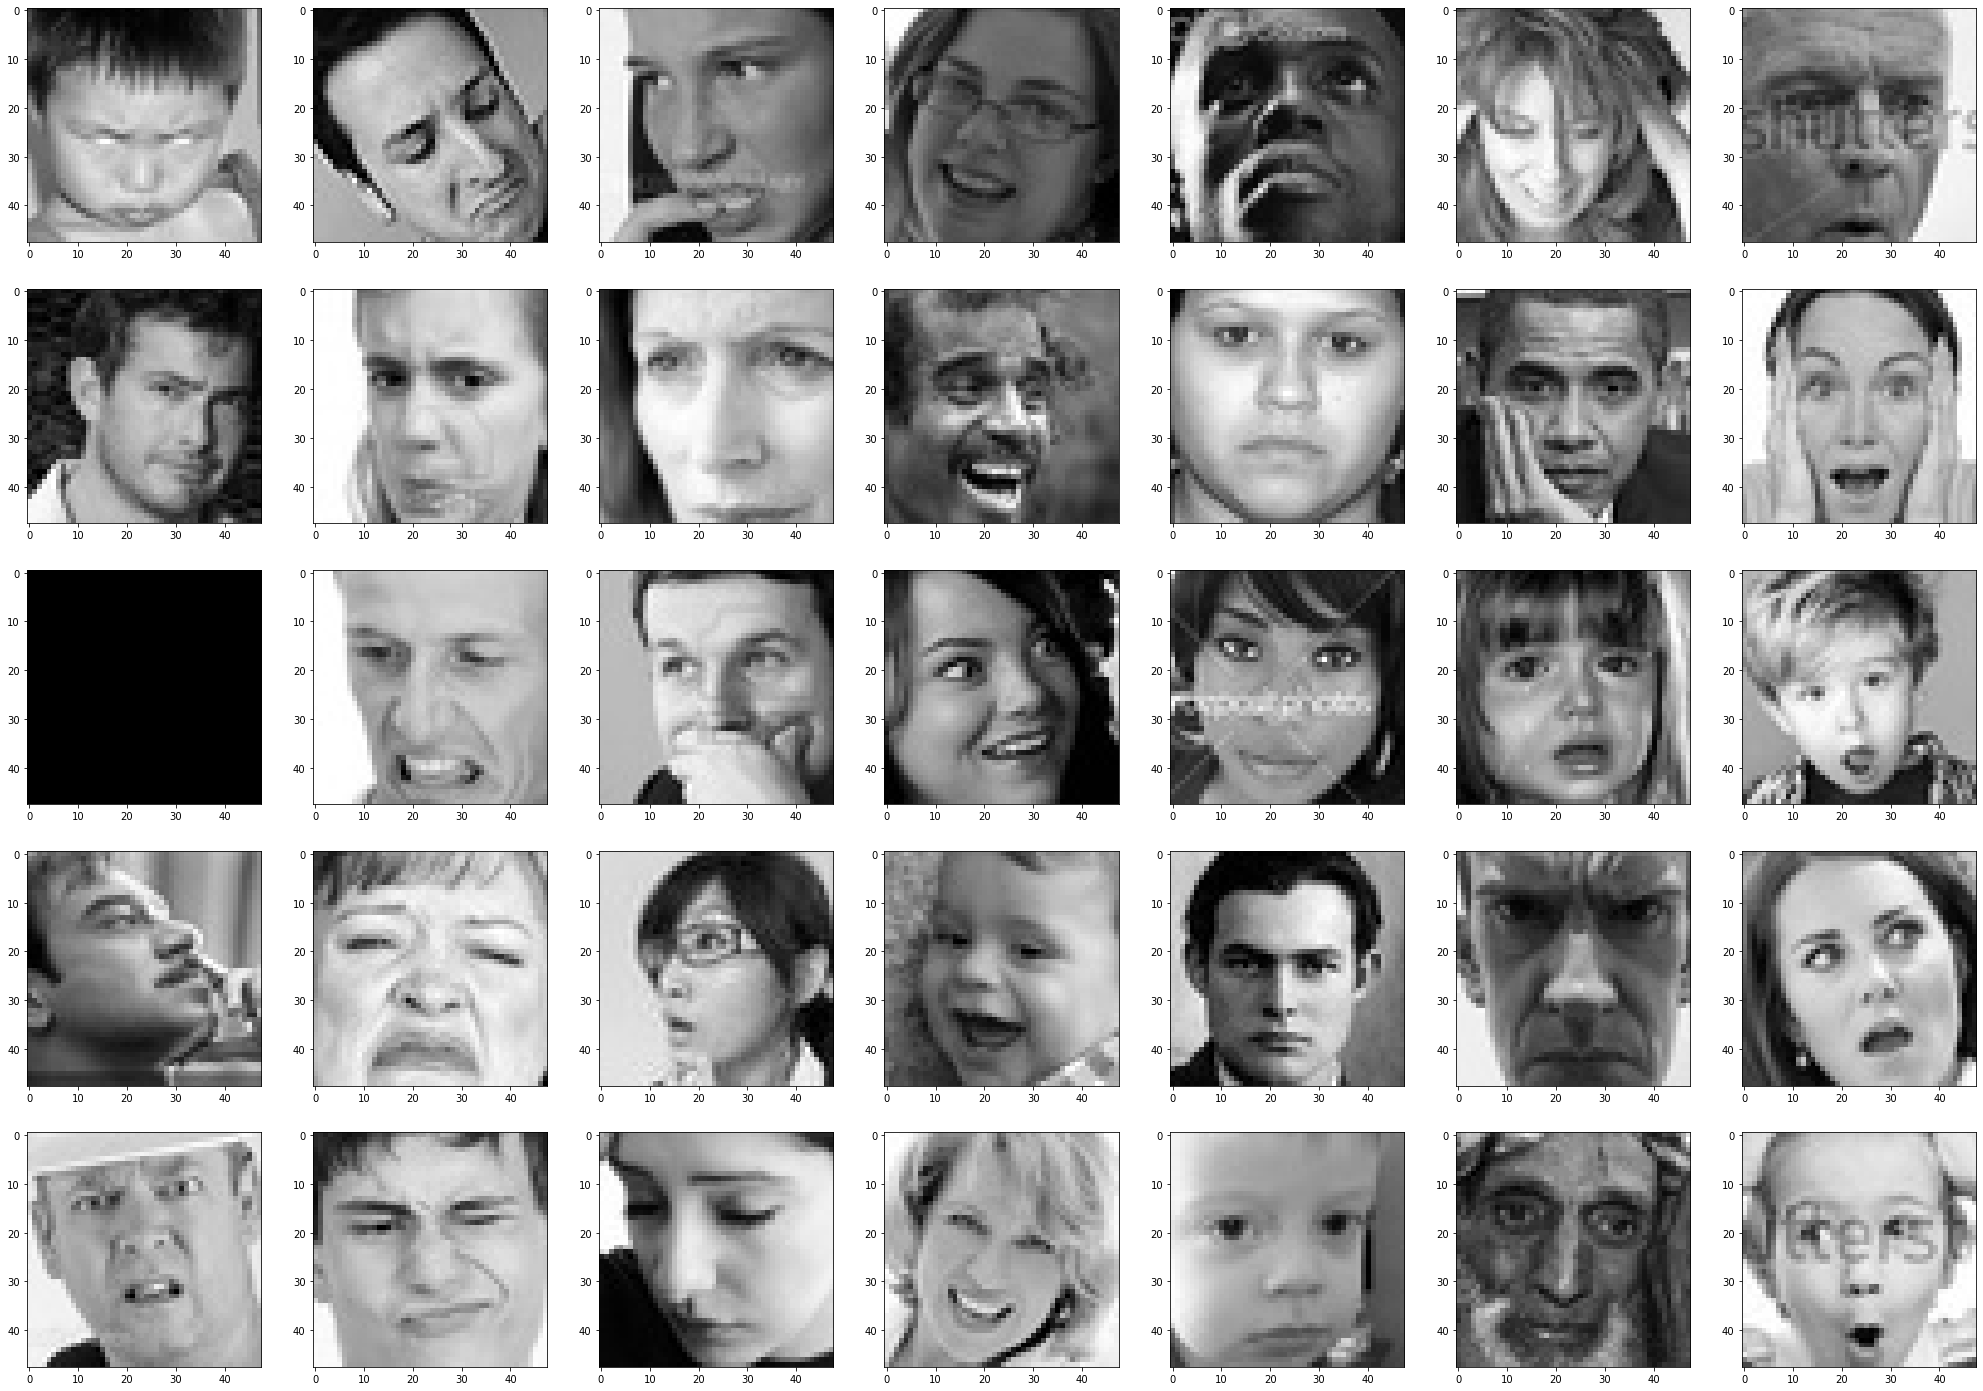

In [4]:
# Data Visualization
from skimage.io import imread
train_dir = "E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\train\\"
test_dir = "E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\test\\"
total_labels = len(os.listdir(train_dir))

fig, ax = plt.subplots(nrows=5, ncols=total_labels, figsize=(35, 25))
for x in range(5):
    for y,v in zip(range(total_labels),os.listdir(train_dir)):
        ax[x][y].imshow(imread(train_dir+v+'/'+os.listdir(train_dir+v)[x]), cmap='gray')

plt.show()

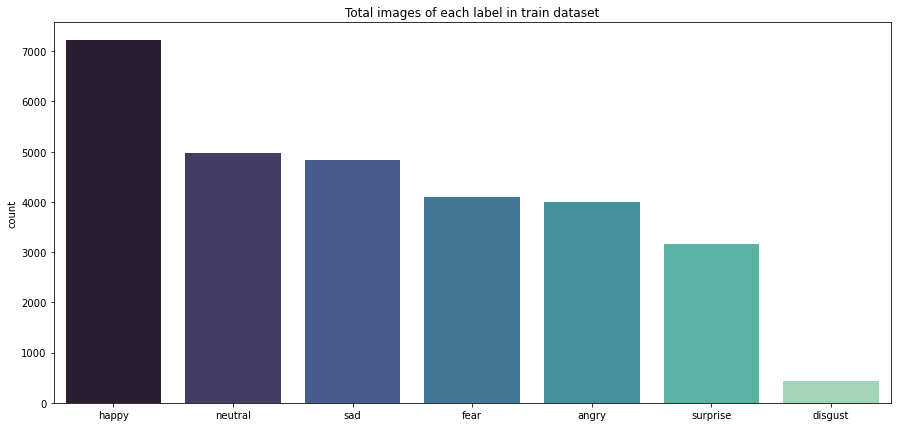

In [5]:
df = {}
for i in os.listdir(train_dir):
    directory = train_dir + i
    df[i] = len(os.listdir(directory))
df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending=False)

plt.figure(figsize=(15,7))
sns.barplot(x=df.index, y="total", palette="mako", data=df)
plt.ylabel("count")
plt.title("Total images of each label in train dataset")
plt.show()

C:\Users\HP\.conda\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


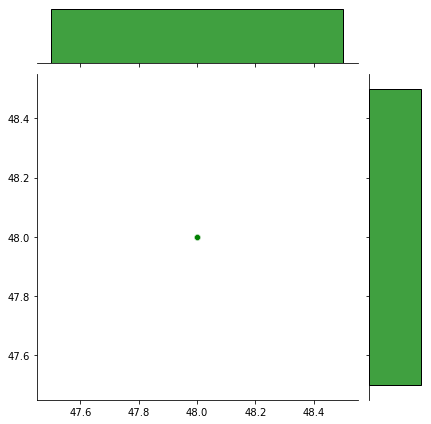

In [7]:
happy = os.listdir(train_dir+'happy/')
dim1, dim2 = [], []

for img_filename in happy:
    img = imread(train_dir+'happy/'+img_filename)
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)
sns.jointplot(dim1, dim2,color='g')
plt.show()

In [8]:
# Data Preprocessing
train_gen = ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_gen = ImageDataGenerator(rescale=1/255)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)

train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_gen.flow_from_directory(directory=test_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Creating the Model

In [9]:
# Create the Model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=img_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=len(os.listdir(train_dir)), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

### Training the model

In [10]:
# Train the model
model.compile(optimizer=Adam(learning_rate=0.0001, 
                             decay=1e-6), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
num_epochs = 20

history = model.fit(train_generator,
                    epochs=num_epochs,
                    verbose=1,
                    #callbacks=callbacks,
                    validation_data=test_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/20
448/448 [==============================] - 749s 2s/step - loss: 1.8758 - accuracy: 0.2291 - val_loss: 2.4066 - val_accuracy: 0.1727
Epoch 2/20
448/448 [==============================] - 724s 2s/step - loss: 1.7979 - accuracy: 0.2467 - val_loss: 1.7777 - val_accuracy: 0.2711
Epoch 3/20
448/448 [==============================] - 862s 2s/step - loss: 1.7871 - accuracy: 0.2566 - val_loss: 1.7454 - val_accuracy: 0.2804
Epoch 4/20
448/448 [==============================] - 924s 2s/step - loss: 1.7728 - accuracy: 0.2655 - val_loss: 1.7190 - val_accuracy: 0.3094
Epoch 5/20
448/448 [==============================] - 843s 2s/step - loss: 1.7593 - accuracy: 0.2738 - val_loss: 1.6849 - val_accuracy: 0.3216
Epoch 6/20
448/448 [==============================] - 844s 2s/step - loss: 1.7365 - accuracy: 0.2873 - val_loss: 1.6280 - val_accuracy: 0.3447
Epoch 7/20
448/448 [==============================] - 825s 2s/step - loss: 1.7047 - accuracy: 0.3113 - val_loss: 1.6262 - val_accuracy: 0.3511

### Saving the trained model

In [12]:
model.save("model.h5")

### Evaluating the model

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print("validation accuracy :", str(test_acc*100)+"%")
print("validation loss :", test_loss)

113/113 [==============================] - 36s 319ms/step - loss: 1.1707 - accuracy: 0.5476
validation accuracy : 54.764556884765625%
validation loss : 1.170734167098999


### Plotting Training and Validation plot

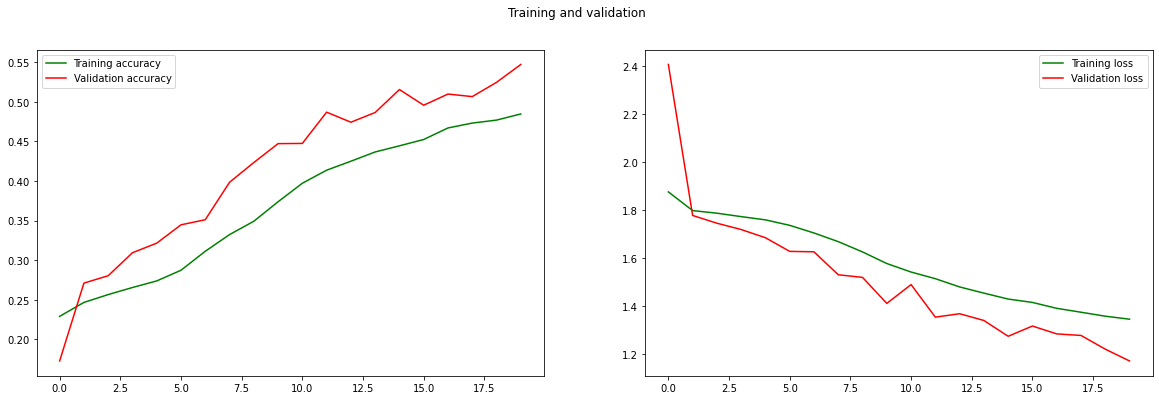

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'g', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'g', label='Training loss')
ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

### Plotting the confusion matrix

              precision    recall  f1-score   support

       angry       0.42      0.49      0.45       958
     disgust       0.55      0.10      0.17       111
        fear       0.42      0.12      0.18      1024
       happy       0.72      0.86      0.78      1774
     neutral       0.44      0.69      0.54      1233
         sad       0.44      0.34      0.38      1247
    surprise       0.71      0.64      0.67       831

    accuracy                           0.55      7178
   macro avg       0.53      0.46      0.45      7178
weighted avg       0.54      0.55      0.52      7178





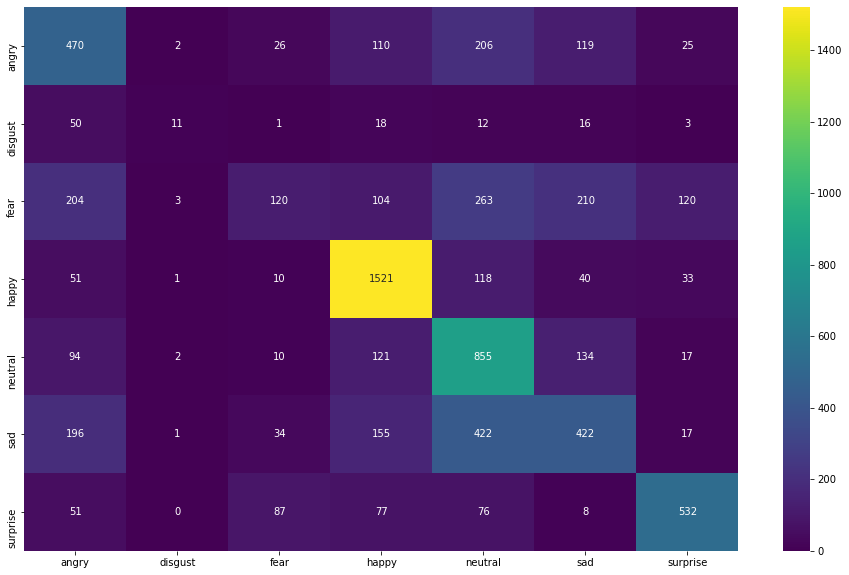

In [65]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(test_generator), axis=-1)
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()), end='\n\n\n')

cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(16,10))
sns.heatmap(cm, cmap=plt.cm.viridis, annot=True, fmt='.0f', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.show()

### Testing our model with new image

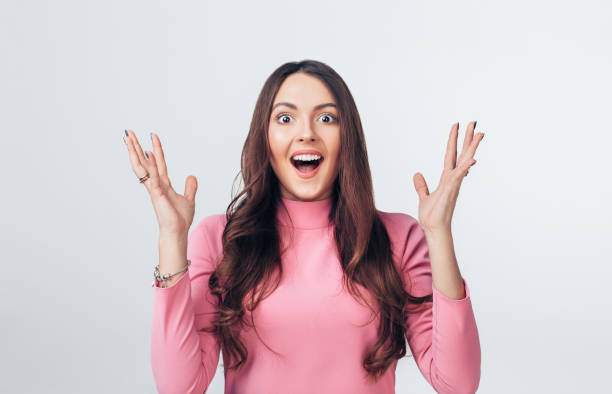

In [69]:
# Testing our model with new image
image = cv2.imread("E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\images\\Surprise.jpg")
from IPython.display import Image
Image(filename='E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\images\\Surprise.jpg')

### Model Prediction

In [70]:
import cv2
from tensorflow.python.keras.models import load_model
import os


# # load the trained model

model = tf.keras.models.load_model("model.h5",
    custom_objects={'Functional':tf.keras.models.Model})
# A list of emoticon categories
EMOTIONS = ['Angry', 'Disgust', 'Happy', 'Sad', 'Surprise', 'Neutral']
# Load image
img = image

# Trim the image to 48 x 48, and turn the grayscale image, normalization
frame = cv2.resize(img,(48,48),interpolation=cv2.INTER_BITS2)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) / 255.0

# Reinvent the image dimension
gray = gray.reshape(1,48,48,1)

# Output the prediction
predicts = model.predict(gray)[0]
label = EMOTIONS[predicts.argmax()]
for (i,j) in zip(range(7),EMOTIONS):
    predictss = predicts[i]
    print("{:^10s}".format(j)+"prediction rate is   {0:.2f}%".format(predictss))
print( "\n\n The system considers this expression to be:",label)

  Angry   prediction rate is   0.09%
 Disgust  prediction rate is   0.02%
  Happy   prediction rate is   0.10%
   Sad    prediction rate is   0.25%
 Surprise prediction rate is   0.36%
 Neutral  prediction rate is   0.13%


 The system considers this expression to be: Surprise


### Song Recommdation

In [73]:
if (label=='Angry'):
    path="E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Angry\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Angry\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Disgust'):
    path="E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Disgust\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Disgust\\'+ d,autoplay=True)
    display(audio)
    
elif (label=="Happy"):
    path="E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Happy\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Happy\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Sad'):
    path="E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Sad\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Sad\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Surprise'):
    path="E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Surprise\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Surprise\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Neutral'):
    path="E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Neutral\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='E:\\INTERNSHIP\\Lets Grow More Internship\\ML-Facial-recognition-to-detect-mood-and-suggest-songs-accordingly\\song\\Neutral\\'+ d,autoplay=True)
    display(audio)

Now Playing: JONY - Love your voice.mp3


# THANK YOU !!